In [1]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn
import matplotlib.patches as patches
from PIL import Image
import pandas as pd

%matplotlib inline

/home/alpha/virtualmachines/virtualenvs/py_3-6-5_2018-11-21/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#prediction output json file path
path = "/aimldl-cod/scripts/api/test.json"

In [3]:
#convert to pandas dataframe
js = pd.read_json(path)

In [66]:
# list((list((list((list(js.result)[0]).items())[2][1][1]).items())[1][1]).items())[3]

In [67]:
# label = list(((list((list((list(js.result)[0]).items())[2][1][1]).items())[0])[1]).items())[0][1]

In [68]:
# label

In [7]:
# confidence = list(((list((list((list(js.result)[0]).items())[2][1][i]).items())[0])[1]).items())[1][1]
# confidence

In [8]:
# ann_type = list((list((list((list(js.result)[0]).items())[2][1][1]).items())[1][1]).items())[0][1]

In [9]:
# y_cd = list((list((list((list(js.result)[0]).items())[2][1][1]).items())[1][1]).items())[1][1]

In [10]:
# x_cd = list((list((list((list(js.result)[0]).items())[2][1][1]).items())[1][1]).items())[2][1]

In [11]:
# height = list((list((list((list(js.result)[0]).items())[2][1][1]).items())[1][1]).items())[3][1]

In [12]:
# width = list((list((list((list(js.result)[0]).items())[2][1][1]).items())[1][1]).items())[4][1]

In [13]:
# print(height)

In [14]:
list((list(js.result)[0]).items())

[('filename', '291018_114921_16718_zed_l_109.jpg'),
 ('size', 0),
 ('regions',
  [{'region_attributes': {'label': 'booth',
     'score': 0.6490324139595031,
     'color': [0.0, 1.0, 0.30769230769230704]},
    'shape_attributes': {'name': 'rect',
     'y': 430,
     'x': 1191,
     'height': 59,
     'width': 47}},
   {'region_attributes': {'label': 'booth',
     'score': 0.5900612473487851,
     'color': [0.0, 1.0, 0.30769230769230704]},
    'shape_attributes': {'name': 'rect',
     'y': 520,
     'x': 1492,
     'height': 90,
     'width': 95}},
   {'region_attributes': {'label': 'crosswalk',
     'score': 0.546990454196929,
     'color': [1.0, 0.6923076923076921, 0.0]},
    'shape_attributes': {'name': 'rect',
     'y': 434,
     'x': 1199,
     'height': 51,
     'width': 49}}]),
 ('file_attributes',
  {'width': 1920,
   'height': 1080,
   'uuid': 'fbfabc82-bdf1-4757-a5d1-edfdaab85551'})]

In [15]:
#Image filename
filename = list(js.result[0].items())[0][1]

In [71]:
#Pred output dictionary
#Label, confidence, y_cood, x_cood, height, width
x = {}
for i in range(len(list(js.result[0].items())[2][1])):
    x[i] = ((list(((list((list((list(js.result)[0]).items())[2][1][i]).items())[0])[1]).items())[0][1],
             list(((list((list((list(js.result)[0]).items())[2][1][i]).items())[0])[1]).items())[1][1],
             list((list((list((list(js.result)[0]).items())[2][1][i]).items())[1][1]).items())[1][1],
             list((list((list((list(js.result)[0]).items())[2][1][i]).items())[1][1]).items())[2][1],
             list((list((list((list(js.result)[0]).items())[2][1][i]).items())[1][1]).items())[3][1],
             list((list((list((list(js.result)[0]).items())[2][1][i]).items())[1][1]).items())[4][1]))

In [72]:
x

{0: ('booth', 0.6490324139595031, 430, 1191, 59, 47),
 1: ('booth', 0.5900612473487851, 520, 1492, 90, 95),
 2: ('crosswalk', 0.546990454196929, 434, 1199, 51, 49)}

In [18]:
# filename

'291018_114921_16718_zed_l_109.jpg'

In [19]:
#Path of prediction imagefile
img_path = "/aimldl-dat/samples/" + filename

In [20]:
img_path

'/aimldl-dat/samples/291018_114921_16718_zed_l_109.jpg'

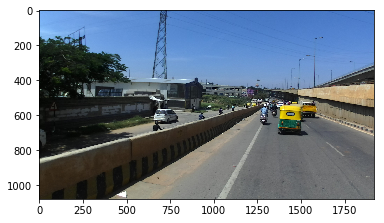

In [21]:
img=mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

In [22]:
# im = np.array(Image.open(img_path), dtype=np.uint8)

# # Create figure and axes
# fig,ax = plt.subplots(1)
# plt.figure(figsize=(18,10))
# # Display the image
# ax.imshow(im)

# # Create a Rectangle patch
# rect = patches.Rectangle((x[0][4] ,x[0][5]),x[0][2],x[0][3],linewidth=5,edgecolor='r',facecolor='r')

# # Add the patch to the Axes
# ax.add_patch(rect)

# plt.show()

In [73]:
#convert image from BGR to RGB
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [74]:
# cv2.rectangle(image, (x[1][3], x[1][2]), (x[1][3] + x[1][5], x[1][2] + x[1][4]), (0, 20, 200), 5)
# cv2.imshow('Window', image)
# # allows us to see image
# # until closed forcefully
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [75]:
# Display image with bounding box and confidence score
for i in range(len(list(js.result[0].items())[2][1])):
    cv2.rectangle(image, (x[i][3], x[i][2]), (x[i][3] + x[i][5], x[i][2] + x[i][4]), (0, 20, 200), 2)
    cv2.putText(image, '{}:{}'.format(x[i][0], x[i][1]), (x[i][3], x[i][2]-2), cv2.FONT_HERSHEY_PLAIN, 0.7, (150,255,150), 1)
cv2.imshow('Window', image)
cv2.waitKey(0)
cv2.destroyAllWindows()    